# Unified Akkadian Dataset - Exploratory Data Analysis

This notebook explores the unified Akkadian dataset created from three sources:
- **eBL** (Electronic Babylonian Library): ~998k words
- **ORACC** (Open Richly Annotated Cuneiform Corpus): ~1.38M words
- **Archibab** (Archives Babyloniennes): ~66k words

## Goals:
1. Statistics on data from each source
2. Word counts and token distributions
3. How preprocessing broke text into tokens (value_signs)
4. Distribution of most common tokens and words
5. Verify datasets are in the same format
6. Find overlaps between datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
from tqdm import tqdm

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 80)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


# Restart kernel if you see ArrowKeyError about extension types



## 1. Load Unified Dataset

In [ ]:

# Define paths
data_dir = Path('../data/processed/unified')

# Load unified corpus
print("Loading unified corpus...")
df = pd.read_parquet(data_dir / 'unified_corpus.parquet')

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)


Loading unified corpus...

Dataset shape: (2450094, 13)
Columns: ['source', 'fragment_id', 'line_num', 'word_idx', 'language', 'value_raw', 'value_signs', 'value_clean', 'lemma', 'domain', 'place_discovery', 'place_composition', 'certainty']

Data types:
source               object
fragment_id          object
line_num              int64
word_idx              int64
language             object
value_raw            object
value_signs          object
value_clean          object
lemma                object
domain               object
place_discovery      object
place_composition    object
certainty            object
dtype: object


In [3]:
# Preview the data
print("Sample rows from unified dataset:")
df.head(10)

Sample rows from unified dataset:


,source,fragment_id,line_num,word_idx,language,value_raw,value_signs,value_clean,lemma,domain,place_discovery,place_composition,certainty
0,ebl,"1848,0720.121",8,1,AKKADIAN,BE-ma,BE ma,BE-ma,['šumma I'],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
1,ebl,"1848,0720.121",8,2,AKKADIAN,AN.GE₆,AN GE,AN.GE₆,['antalû I'],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
2,ebl,"1848,0720.121",9,1,AKKADIAN,ŠEŠ,ŠEŠ,ŠEŠ,[],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
3,ebl,"1848,0720.121",9,2,AKKADIAN,ŠEŠ-šu₂,ŠEŠ šu,ŠEŠ-šu₂,[],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
4,ebl,"1848,0720.121",9,3,AKKADIAN,GU₇,GU,GU₇,['akālu I'],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
5,ebl,"1848,0720.121",10,0,AKKADIAN,DIŠ,DIŠ,DIŠ,[],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
6,ebl,"1848,0720.121",10,1,AKKADIAN,U₄.15.KAM₂,U 15 KAM,U₄.15.KAM₂,['šapattu I'],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
7,ebl,"1848,0720.121",10,2,AKKADIAN,AN.GE₆,AN GE,AN.GE₆,['antalû I'],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
8,ebl,"1848,0720.121",10,3,AKKADIAN,GAR,GAR,GAR,[],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE
9,ebl,"1848,0720.121",11,1,AKKADIAN,HI.GAR,HI GAR,HI.GAR,[],['CANONICAL ➝ Divination ➝ Celestial'],nan,nan,SURE


## 2. Source Distribution Statistics

In [4]:
print("="*70)
print("SOURCE DISTRIBUTION STATISTICS")
print("="*70)

# Words per source
source_word_counts = df['source'].value_counts()
source_text_counts = df.groupby('source')['fragment_id'].nunique()

print("\n📊 Words per source:")
for source in source_word_counts.index:
    words = source_word_counts[source]
    texts = source_text_counts[source]
    pct = 100 * words / len(df)
    print(f"  {source:12s}: {words:>10,} words ({pct:5.1f}%) from {texts:>6,} texts")

print(f"\n  {'TOTAL':12s}: {len(df):>10,} words from {df['fragment_id'].nunique():>6,} texts")

SOURCE DISTRIBUTION STATISTICS

📊 Words per source:
  oracc       :  1,385,932 words ( 56.6%) from 14,210 texts
  ebl         :    998,353 words ( 40.7%) from 24,909 texts
  archibab    :     65,809 words (  2.7%) from  1,310 texts

  TOTAL       :  2,450,094 words from 40,429 texts


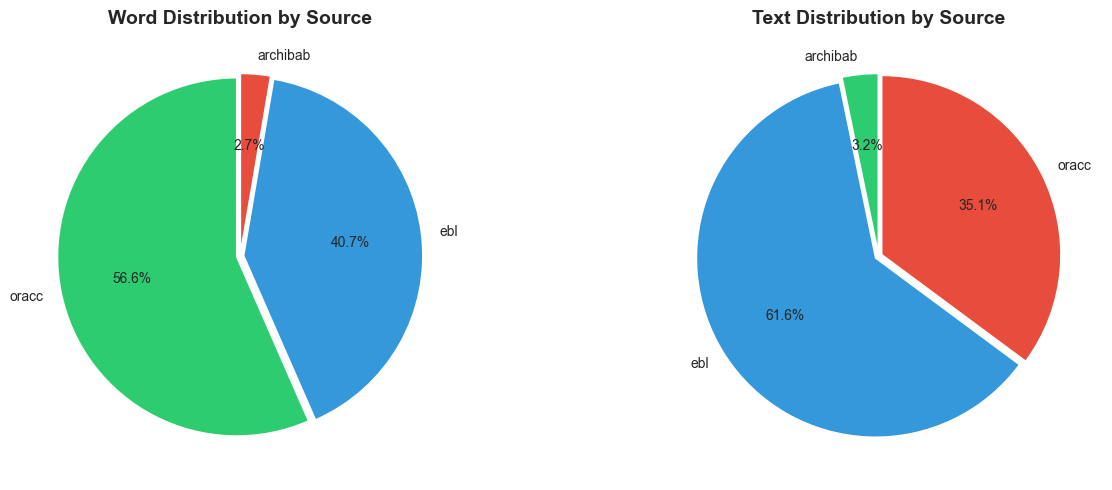

In [5]:
# Visualize source distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Words per source
colors = ['#2ecc71', '#3498db', '#e74c3c']
axes[0].pie(source_word_counts, labels=source_word_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.02]*len(source_word_counts))
axes[0].set_title('Word Distribution by Source', fontsize=14, fontweight='bold')

# Texts per source
axes[1].pie(source_text_counts, labels=source_text_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=[0.02]*len(source_text_counts))
axes[1].set_title('Text Distribution by Source', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/unified/source_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [6]:
# Average words per text by source
avg_words_per_text = df.groupby('source').apply(lambda x: len(x) / x['fragment_id'].nunique())

print("\n📊 Average words per text by source:")
for source, avg in avg_words_per_text.sort_values(ascending=False).items():
    print(f"  {source:12s}: {avg:.1f} words/text")


📊 Average words per text by source:
  oracc       : 97.5 words/text
  archibab    : 50.2 words/text
  ebl         : 40.1 words/text


/var/folders/md/gt4k58h10yg6_prgzyrtst4wjnz8k8/T/ipykernel_35264/3227517526.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_words_per_text = df.groupby('source').apply(lambda x: len(x) / x['fragment_id'].nunique())


## 3. Language Distribution

In [7]:
print("="*70)
print("LANGUAGE DISTRIBUTION")
print("="*70)

lang_counts = df['language'].value_counts()
print("\n📊 Overall language distribution:")
for lang, count in lang_counts.items():
    pct = 100 * count / len(df)
    print(f"  {lang:15s}: {count:>10,} ({pct:5.1f}%)")

LANGUAGE DISTRIBUTION

📊 Overall language distribution:
  AKKADIAN       :  2,384,721 ( 97.3%)
  AKK            :     65,373 (  2.7%)


In [8]:
# Language distribution by source
print("\n📊 Language distribution by source:")
lang_by_source = pd.crosstab(df['source'], df['language'], margins=True)
print(lang_by_source)


📊 Language distribution by source:
language    AKK  AKKADIAN      All
source                            
archibab  65373       436    65809
ebl           0    998353   998353
oracc         0   1385932  1385932
All       65373   2384721  2450094


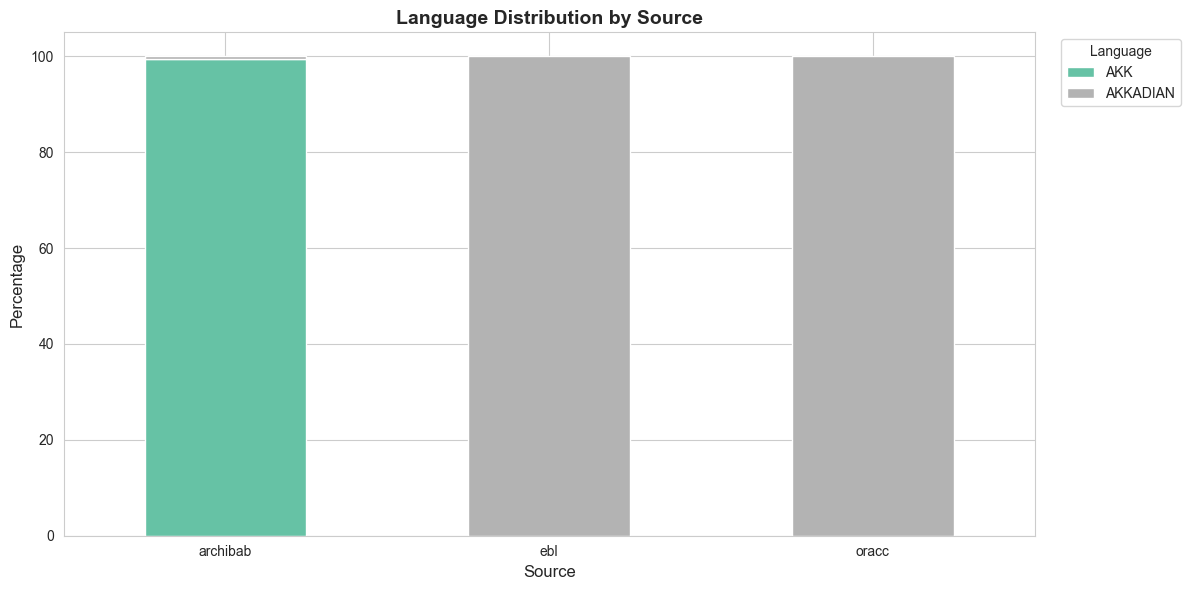

In [9]:
# Visualize language by source
fig, ax = plt.subplots(figsize=(12, 6))

lang_by_source_pct = pd.crosstab(df['source'], df['language'], normalize='index') * 100
lang_by_source_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

ax.set_xlabel('Source', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Language Distribution by Source', fontsize=14, fontweight='bold')
ax.legend(title='Language', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('../data/processed/unified/language_by_source.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Certainty Distribution

In [10]:
print("="*70)
print("CERTAINTY DISTRIBUTION")
print("="*70)

cert_counts = df['certainty'].value_counts()
print("\n📊 Certainty levels:")
for cert, count in cert_counts.items():
    pct = 100 * count / len(df)
    print(f"  {cert:25s}: {count:>10,} ({pct:5.1f}%)")

CERTAINTY DISTRIBUTION

📊 Certainty levels:
  SURE                     :  2,334,953 ( 95.3%)
  MISSING_BUT_COMPLETED    :     52,244 (  2.1%)
  BLURRED                  :     34,245 (  1.4%)
  FIXED_BY_EDITOR          :     10,662 (  0.4%)
  FORGOTTEN_SIGN           :      9,329 (  0.4%)
  HAS_DOUBTS               :      8,661 (  0.4%)


In [11]:
# Certainty by source
print("\n📊 Certainty distribution by source:")
cert_by_source = pd.crosstab(df['source'], df['certainty'])
print(cert_by_source)


📊 Certainty distribution by source:
certainty  BLURRED  FIXED_BY_EDITOR  FORGOTTEN_SIGN  HAS_DOUBTS  \
source                                                            
archibab         0                0               0           0   
ebl              0             1082               0           0   
oracc        34245             9580            9329        8661   

certainty  MISSING_BUT_COMPLETED     SURE  
source                                     
archibab                       1    65808  
ebl                            0   997271  
oracc                      52243  1271874  


## 5. Word/Token Analysis: Understanding Tokenization

In [12]:
print("="*70)
print("TOKENIZATION ANALYSIS: How preprocessing broke text into tokens")
print("="*70)

# Show examples of value_raw -> value_signs transformation
print("\n📊 Examples of tokenization (value_raw -> value_signs):")
print("-" * 70)

# Get diverse examples
sample_rows = df[df['value_signs'].notna() & (df['value_signs'] != df['value_raw'])].sample(15, random_state=42)

print(f"{'value_raw':<25} -> {'value_signs':<30} (signs count)")
print("-" * 70)
for _, row in sample_rows.iterrows():
    raw = str(row['value_raw'])[:24]
    signs = str(row['value_signs'])[:29]
    sign_count = len(str(row['value_signs']).split()) if pd.notna(row['value_signs']) else 0
    print(f"{raw:<25} -> {signs:<30} ({sign_count} signs)")

TOKENIZATION ANALYSIS: How preprocessing broke text into tokens

📊 Examples of tokenization (value_raw -> value_signs):
----------------------------------------------------------------------
value_raw                 -> value_signs                    (signs count)
----------------------------------------------------------------------
ZAG-šu₂                   -> ZAG šu                         (2 signs)
nu-zu                     -> nu zu                          (2 signs)
DU₃.DU₃.BI                -> DU DU BI                       (3 signs)
BAD₅.BAD₅-šu₂             -> BAD BAD šu                     (3 signs)
KU₄-ub-ma                 -> KU ub ma                       (3 signs)
a-rak                     -> a rak                          (2 signs)
KAN₅                      -> KAN                            (1 signs)
40-bi                     -> 40 bi                          (2 signs)
a-lak-ta-šu₂              -> a lak ta šu                    (4 signs)
{dug}a-gan-ni             -> a gan

In [13]:
# Compute sign counts per word
df['sign_count'] = df['value_signs'].fillna('').str.split().apply(len)

print("\n📊 Signs per word statistics:")
print(f"  Mean signs per word:   {df['sign_count'].mean():.2f}")
print(f"  Median signs per word: {df['sign_count'].median():.0f}")
print(f"  Max signs per word:    {df['sign_count'].max()}")

print("\n📊 Signs per word distribution:")
sign_dist = df['sign_count'].value_counts().sort_index().head(15)
for signs, count in sign_dist.items():
    pct = 100 * count / len(df)
    bar = '█' * int(pct)
    print(f"  {signs:2d} signs: {count:>8,} ({pct:5.1f}%) {bar}")


📊 Signs per word statistics:
  Mean signs per word:   2.00
  Median signs per word: 2
  Max signs per word:    16

📊 Signs per word distribution:
   0 signs:        8 (  0.0%) 
   1 signs: 1,054,198 ( 43.0%) ███████████████████████████████████████████
   2 signs:  696,907 ( 28.4%) ████████████████████████████
   3 signs:  442,905 ( 18.1%) ██████████████████
   4 signs:  184,769 (  7.5%) ███████
   5 signs:   54,113 (  2.2%) ██
   6 signs:   13,197 (  0.5%) 
   7 signs:    3,085 (  0.1%) 
   8 signs:      701 (  0.0%) 
   9 signs:      164 (  0.0%) 
  10 signs:       30 (  0.0%) 
  11 signs:        9 (  0.0%) 
  12 signs:        5 (  0.0%) 
  16 signs:        3 (  0.0%) 


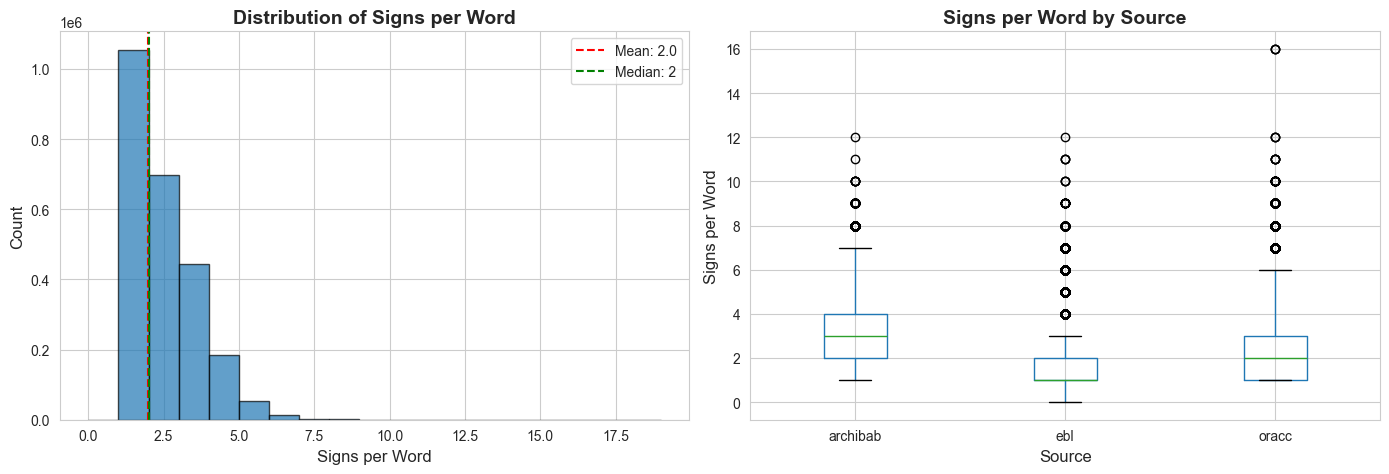

In [14]:
# Visualize signs per word
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['sign_count'], bins=range(0, 20), edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Signs per Word', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Signs per Word', fontsize=14, fontweight='bold')
axes[0].axvline(df['sign_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["sign_count"].mean():.1f}')
axes[0].axvline(df['sign_count'].median(), color='green', linestyle='--', label=f'Median: {df["sign_count"].median():.0f}')
axes[0].legend()

# By source
df.boxplot(column='sign_count', by='source', ax=axes[1])
axes[1].set_xlabel('Source', fontsize=12)
axes[1].set_ylabel('Signs per Word', fontsize=12)
axes[1].set_title('Signs per Word by Source', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.savefig('../data/processed/unified/signs_per_word.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Most Common Tokens and Words

In [15]:
print("="*70)
print("VOCABULARY ANALYSIS")
print("="*70)

# Count unique values
print("\n📊 Vocabulary sizes:")
print(f"  Unique value_raw:   {df['value_raw'].nunique():>10,}")
print(f"  Unique value_clean: {df['value_clean'].nunique():>10,}")

# Count signs (tokens)
all_signs = df['value_signs'].dropna().str.split().explode()
sign_vocab = all_signs.nunique()
print(f"  Unique signs:       {sign_vocab:>10,}")

VOCABULARY ANALYSIS

📊 Vocabulary sizes:
  Unique value_raw:      253,262
  Unique value_clean:    238,139
  Unique signs:           16,740


In [16]:
# Most common words (value_clean)
word_counts = df['value_clean'].value_counts()

print("\n📊 TOP 50 MOST COMMON WORDS (value_clean):")
print("-" * 60)
total_words = len(df)
for i, (word, count) in enumerate(word_counts.head(50).items(), 1):
    pct = 100 * count / total_words
    print(f"{i:3d}. {word:25s} {count:>10,} ({pct:5.2f}%)")


📊 TOP 50 MOST COMMON WORDS (value_clean):
------------------------------------------------------------
  1. ina                           80,627 ( 3.29%)
  2. ša₂                           51,898 ( 2.12%)
  3. a-na                          32,702 ( 1.33%)
  4. ša                            26,444 ( 1.08%)
  5. LUGAL                         26,151 ( 1.07%)
  6. ana                           24,992 ( 1.02%)
  7. u                             23,308 ( 0.95%)
  8. KUR                           22,447 ( 0.92%)
  9. DIŠ                           22,048 ( 0.90%)
 10. IGI                           18,094 ( 0.74%)
 11. u₃                            14,716 ( 0.60%)
 12. la                            14,437 ( 0.59%)
 13. E₂                            14,397 ( 0.59%)
 14. i-na                          10,582 ( 0.43%)
 15. MIN                            9,114 ( 0.37%)
 16. MAN                            9,075 ( 0.37%)
 17. A                              8,633 ( 0.35%)
 18. 1                       

In [17]:
# Most common signs (tokens)
sign_counts = Counter(all_signs)

print("\n📊 TOP 50 MOST COMMON SIGNS (tokens):")
print("-" * 60)
total_signs = len(all_signs)
for i, (sign, count) in enumerate(sign_counts.most_common(50), 1):
    pct = 100 * count / total_signs
    print(f"{i:3d}. {sign:25s} {count:>10,} ({pct:5.2f}%)")


📊 TOP 50 MOST COMMON SIGNS (tokens):
------------------------------------------------------------
  1. a                            189,345 ( 3.87%)
  2. u                            132,205 ( 2.70%)
  3. šu                           127,460 ( 2.60%)
  4. ša                           118,828 ( 2.43%)
  5. ma                           114,343 ( 2.34%)
  6. na                           107,412 ( 2.19%)
  7. MEŠ                           84,388 ( 1.72%)
  8. ina                           81,855 ( 1.67%)
  9. i                             70,842 ( 1.45%)
 10. nu                            65,508 ( 1.34%)
 11. e                             62,818 ( 1.28%)
 12. ni                            61,524 ( 1.26%)
 13. ti                            60,502 ( 1.24%)
 14. la                            50,793 ( 1.04%)
 15. KUR                           48,072 ( 0.98%)
 16. tu                            47,118 ( 0.96%)
 17. lu                            44,002 ( 0.90%)
 18. mu                           

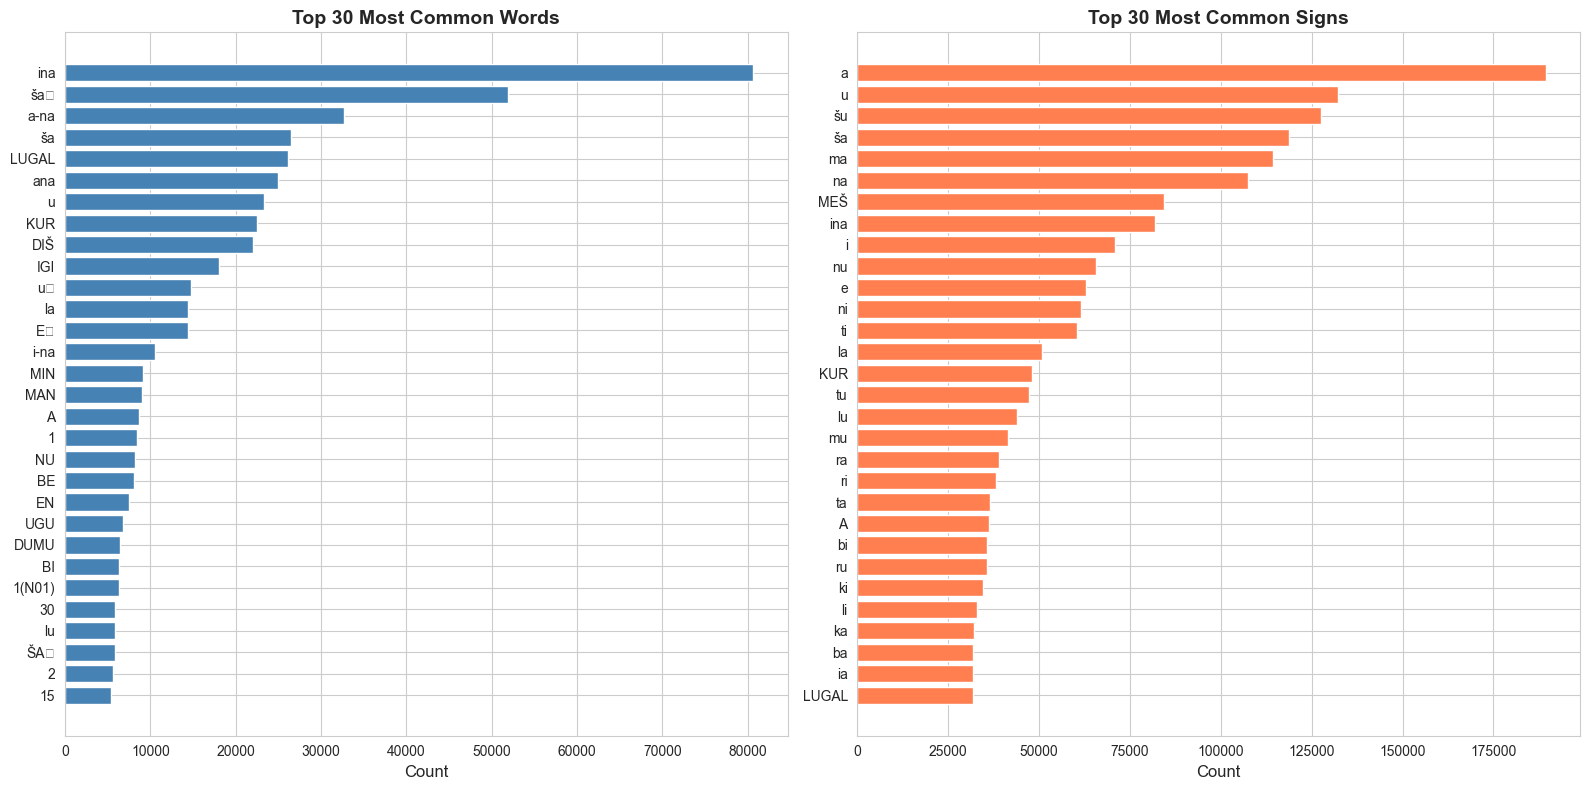

In [18]:
# Visualize most common tokens
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 30 words
top_words = word_counts.head(30)
axes[0].barh(range(len(top_words)), top_words.values, color='steelblue')
axes[0].set_yticks(range(len(top_words)))
axes[0].set_yticklabels(top_words.index)
axes[0].invert_yaxis()
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_title('Top 30 Most Common Words', fontsize=14, fontweight='bold')

# Top 30 signs
top_signs = dict(sign_counts.most_common(30))
axes[1].barh(range(len(top_signs)), list(top_signs.values()), color='coral')
axes[1].set_yticks(range(len(top_signs)))
axes[1].set_yticklabels(list(top_signs.keys()))
axes[1].invert_yaxis()
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_title('Top 30 Most Common Signs', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/unified/top_tokens.png', dpi=150, bbox_inches='tight')
plt.show()

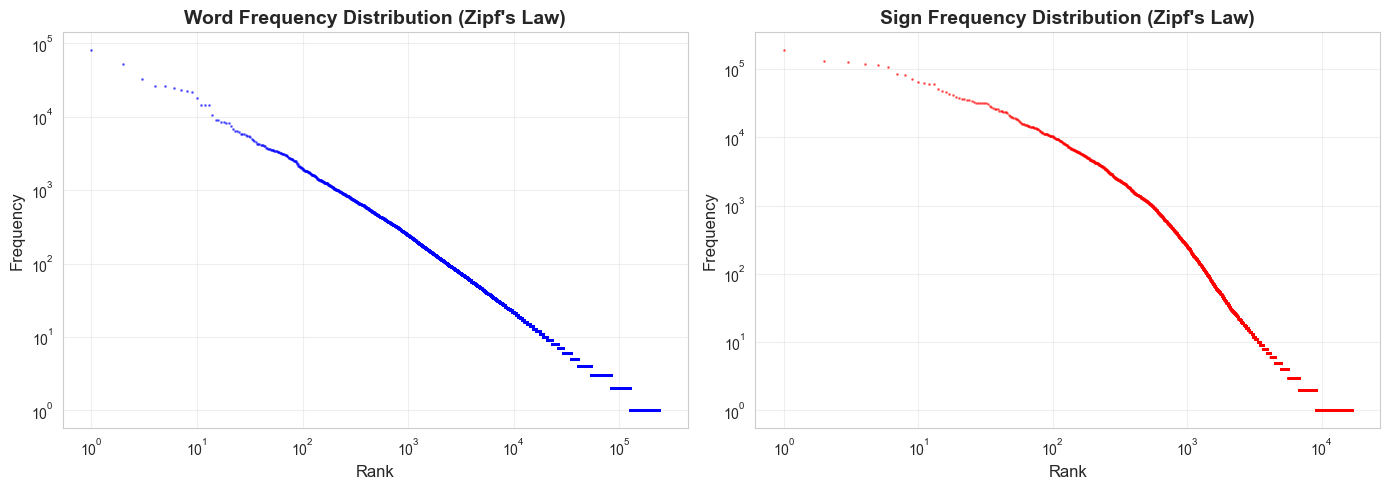

In [19]:
# Word frequency distribution (Zipf's law)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Word frequency (log-log)
word_freq = word_counts.values
ranks = np.arange(1, len(word_freq) + 1)
axes[0].loglog(ranks, word_freq, 'b.', alpha=0.5, markersize=2)
axes[0].set_xlabel('Rank', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title("Word Frequency Distribution (Zipf's Law)", fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Sign frequency (log-log)
sign_freq = np.array([c for _, c in sign_counts.most_common()])
ranks = np.arange(1, len(sign_freq) + 1)
axes[1].loglog(ranks, sign_freq, 'r.', alpha=0.5, markersize=2)
axes[1].set_xlabel('Rank', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title("Sign Frequency Distribution (Zipf's Law)", fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/unified/frequency_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [20]:
# Vocabulary coverage analysis
print("\n📊 VOCABULARY COVERAGE ANALYSIS")
print("-" * 60)

cumulative_coverage = np.cumsum(word_freq) / np.sum(word_freq) * 100

for target in [50, 75, 90, 95, 99]:
    idx = np.argmax(cumulative_coverage >= target)
    print(f"  Top {idx+1:>6,} words cover {target}% of all word occurrences")

print(f"\n  Total unique words: {len(word_freq):,}")


📊 VOCABULARY COVERAGE ANALYSIS
------------------------------------------------------------
  Top    839 words cover 50% of all word occurrences
  Top 11,128 words cover 75% of all word occurrences
  Top 69,089 words cover 90% of all word occurrences
  Top 121,914 words cover 95% of all word occurrences
  Top 214,297 words cover 99% of all word occurrences

  Total unique words: 238,139


## 7. Text Length Distribution

In [21]:
print("="*70)
print("TEXT LENGTH DISTRIBUTION")
print("="*70)

# Words per text
words_per_text = df.groupby('fragment_id').size()

print("\n📊 Words per text statistics:")
print(f"  Mean:   {words_per_text.mean():.1f}")
print(f"  Median: {words_per_text.median():.0f}")
print(f"  Std:    {words_per_text.std():.1f}")
print(f"  Min:    {words_per_text.min()}")
print(f"  Max:    {words_per_text.max()}")

print("\n📊 Percentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    val = np.percentile(words_per_text, p)
    print(f"  {p}th percentile: {val:.0f} words")

TEXT LENGTH DISTRIBUTION

📊 Words per text statistics:
  Mean:   60.6
  Median: 19
  Std:    244.8
  Min:    1
  Max:    18810

📊 Percentiles:
  25th percentile: 7 words
  50th percentile: 19 words
  75th percentile: 51 words
  90th percentile: 121 words
  95th percentile: 210 words
  99th percentile: 624 words


In [22]:
# Words per text by source
words_per_text_source = df.groupby(['fragment_id', 'source']).size().reset_index(name='word_count')

print("\n📊 Words per text by source:")
for source in words_per_text_source['source'].unique():
    subset = words_per_text_source[words_per_text_source['source'] == source]['word_count']
    print(f"  {source:12s}: mean={subset.mean():>6.1f}, median={subset.median():>5.0f}, max={subset.max():>5d}")


📊 Words per text by source:
  ebl         : mean=  40.1, median=   14, max= 2929
  archibab    : mean=  50.2, median=   38, max=  730
  oracc       : mean=  97.5, median=   28, max=18810


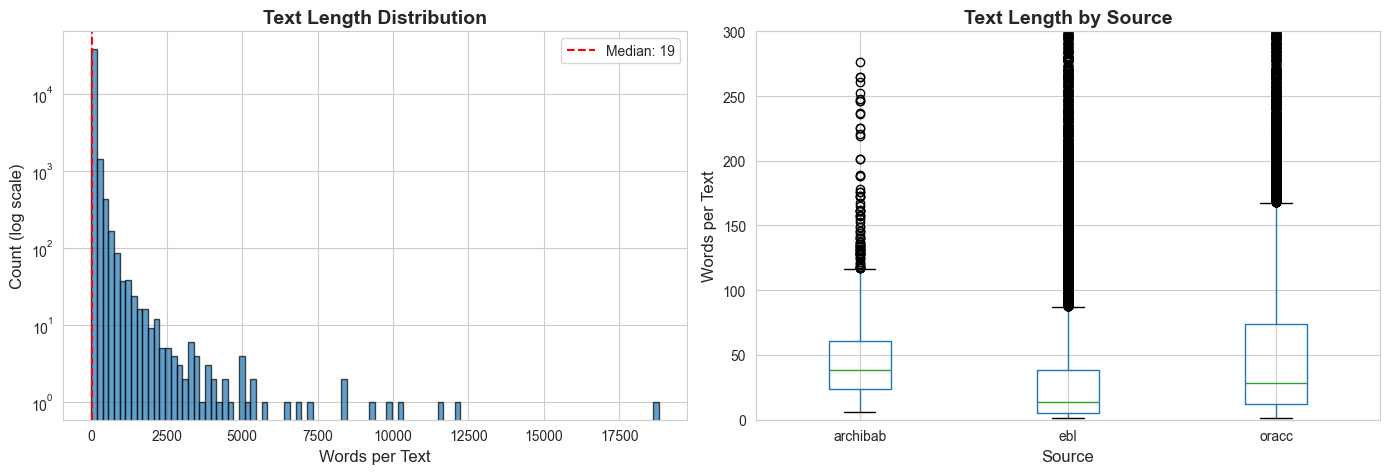

In [23]:
# Visualize text lengths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall distribution (log scale)
axes[0].hist(words_per_text, bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Words per Text', fontsize=12)
axes[0].set_ylabel('Count (log scale)', fontsize=12)
axes[0].set_title('Text Length Distribution', fontsize=14, fontweight='bold')
axes[0].set_yscale('log')
axes[0].axvline(words_per_text.median(), color='red', linestyle='--', label=f'Median: {words_per_text.median():.0f}')
axes[0].legend()

# By source (boxplot)
words_per_text_source.boxplot(column='word_count', by='source', ax=axes[1])
axes[1].set_xlabel('Source', fontsize=12)
axes[1].set_ylabel('Words per Text', fontsize=12)
axes[1].set_title('Text Length by Source', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 300)  # Limit y for visibility
plt.suptitle('')

plt.tight_layout()
plt.savefig('../data/processed/unified/text_lengths.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Verify Dataset Format Consistency

In [24]:
print("="*70)
print("DATASET FORMAT CONSISTENCY CHECK")
print("="*70)

# Check for missing values by source
print("\n📊 Missing values by source:")
for source in df['source'].unique():
    subset = df[df['source'] == source]
    print(f"\n  {source.upper()}:")
    missing = subset.isnull().sum()
    for col, count in missing.items():
        if count > 0:
            pct = 100 * count / len(subset)
            print(f"    {col}: {count:,} missing ({pct:.1f}%)")

DATASET FORMAT CONSISTENCY CHECK

📊 Missing values by source:

  EBL:
    value_clean: 36 missing (0.0%)

  ARCHIBAB:
    value_clean: 65,809 missing (100.0%)

  ORACC:


In [25]:
# Check data types consistency
print("\n📊 Data type consistency by source:")
print("-" * 70)

for col in df.columns:
    types_by_source = {}
    for source in df['source'].unique():
        subset = df[df['source'] == source][col].dropna()
        if len(subset) > 0:
            # Check if values are strings or numbers
            sample_type = type(subset.iloc[0]).__name__
            types_by_source[source] = sample_type
    
    types_str = ', '.join([f"{s}: {t}" for s, t in types_by_source.items()])
    consistent = len(set(types_by_source.values())) <= 1
    status = "✓" if consistent else "⚠️"
    print(f"  {status} {col}: {types_str}")


📊 Data type consistency by source:
----------------------------------------------------------------------
  ✓ source: ebl: str, archibab: str, oracc: str
  ✓ fragment_id: ebl: str, archibab: str, oracc: str
  ✓ line_num: ebl: int64, archibab: int64, oracc: int64
  ✓ word_idx: ebl: int64, archibab: int64, oracc: int64
  ✓ language: ebl: str, archibab: str, oracc: str
  ✓ value_raw: ebl: str, archibab: str, oracc: str
  ✓ value_signs: ebl: str, archibab: str, oracc: str
  ✓ value_clean: ebl: str, oracc: str
  ✓ lemma: ebl: str, archibab: str, oracc: str
  ✓ domain: ebl: str, archibab: str, oracc: str
  ✓ place_discovery: ebl: str, archibab: str, oracc: str
  ✓ place_composition: ebl: str, archibab: str, oracc: str
  ✓ certainty: ebl: str, archibab: str, oracc: str
  ✓ sign_count: ebl: int64, archibab: int64, oracc: int64


In [26]:
# Sample comparison across sources
print("\n📊 Sample rows from each source:")
print("="*100)

for source in df['source'].unique():
    print(f"\n--- {source.upper()} ---")
    sample = df[df['source'] == source].sample(3, random_state=42)
    display(sample[['fragment_id', 'line_num', 'word_idx', 'language', 'value_raw', 'value_signs', 'value_clean', 'certainty']])


📊 Sample rows from each source:

--- EBL ---


,fragment_id,line_num,word_idx,language,value_raw,value_signs,value_clean,certainty
455646,K.16426,3,3,AKKADIAN,pa-tan,pa tan,pa-tan,SURE
360695,IM.76976,21,6,AKKADIAN,{d}ARA,ARA,{d}ARA,SURE
413068,K.12375,19,8,AKKADIAN,SILIM,SILIM,SILIM,SURE



--- ARCHIBAB ---


,fragment_id,line_num,word_idx,language,value_raw,value_signs,value_clean,certainty
1010840,ARM 6 71,15,1,AKK,ṣe-ri-ia,ṣe ri ia,None,SURE
1047312,OBTR 38,4,3,AKK,li-ba-lí-ṭú-ki,li ba lí ṭú ki,None,SURE
1042378,ARM 27 45,6,2,AKK,la-ap-ta,la ap ta,None,SURE



--- ORACC ---


,fragment_id,line_num,word_idx,language,value_raw,value_signs,value_clean,certainty
1513715,P271774,0,0,AKKADIAN,gub-ba,gub ba,gub-ba,SURE
1409311,Q005926,0,3166,AKKADIAN,DUG₃.GA-iš,DUG GA iš,DUG₃.GA-iš,SURE
1410256,Q005929,0,256,AKKADIAN,{kur}kar-du-ni-aš₂,kar du ni aš,{kur}kar-du-ni-aš₂,SURE


In [27]:
# Check value_signs format consistency
print("\n📊 value_signs format examples by source:")
print("-" * 70)

for source in df['source'].unique():
    subset = df[df['source'] == source]['value_signs'].dropna()
    print(f"\n  {source.upper()} examples:")
    for val in subset.sample(5, random_state=42).values:
        print(f"    '{val}'")


📊 value_signs format examples by source:
----------------------------------------------------------------------

  EBL examples:
    'pa tan'
    'ARA'
    'SILIM'
    'KUR'
    'BA AN DU DU u'

  ARCHIBAB examples:
    'ṣe ri ia'
    'li ba lí ṭú ki'
    'la ap ta'
    'qa bé ku nu ši im'
    'i na'

  ORACC examples:
    'gub ba'
    'DUG GA iš'
    'kar du ni aš'
    'šu uk lu lu'
    'šu mi lu'


## 9. Find Overlaps Between Datasets

In [28]:
print("="*70)
print("DATASET OVERLAP ANALYSIS")
print("="*70)

# Get fragment IDs by source
source_fragments = {}
for source in df['source'].unique():
    source_fragments[source] = set(df[df['source'] == source]['fragment_id'].unique())
    print(f"  {source}: {len(source_fragments[source]):,} unique fragment IDs")

DATASET OVERLAP ANALYSIS
  ebl: 24,909 unique fragment IDs
  archibab: 1,310 unique fragment IDs
  oracc: 14,210 unique fragment IDs


In [29]:
# Check for exact fragment_id overlaps
print("\n📊 Fragment ID overlaps:")
print("-" * 60)

sources = list(source_fragments.keys())
for i, source1 in enumerate(sources):
    for source2 in sources[i+1:]:
        overlap = source_fragments[source1] & source_fragments[source2]
        if overlap:
            print(f"  {source1} ∩ {source2}: {len(overlap)} overlapping fragment IDs")
            print(f"    Examples: {list(overlap)[:5]}")
        else:
            print(f"  {source1} ∩ {source2}: No overlapping fragment IDs")


📊 Fragment ID overlaps:
------------------------------------------------------------
  ebl ∩ archibab: No overlapping fragment IDs
  ebl ∩ oracc: No overlapping fragment IDs
  archibab ∩ oracc: No overlapping fragment IDs


In [30]:
# Check for similar/fuzzy fragment ID overlaps
print("\n📊 Checking for similar fragment IDs (fuzzy matching):")
print("-" * 60)

# Normalize fragment IDs for comparison
def normalize_id(fid):
    """Normalize fragment ID for comparison."""
    import re
    # Remove common prefixes
    fid = str(fid).upper()
    fid = re.sub(r'^EBL_', '', fid)
    fid = re.sub(r'^ORACC_', '', fid)
    fid = re.sub(r'^ARCHIBAB_', '', fid)
    # Remove special characters
    fid = re.sub(r'[^A-Z0-9]', '', fid)
    return fid

# Create normalized ID sets
normalized_fragments = {}
for source in df['source'].unique():
    normalized_fragments[source] = {}
    for fid in source_fragments[source]:
        norm = normalize_id(fid)
        normalized_fragments[source][norm] = fid

# Check overlaps with normalized IDs
for i, source1 in enumerate(sources):
    for source2 in sources[i+1:]:
        norm1 = set(normalized_fragments[source1].keys())
        norm2 = set(normalized_fragments[source2].keys())
        overlap = norm1 & norm2
        if overlap:
            print(f"  {source1} ∩ {source2}: {len(overlap)} similar (normalized) IDs")
            for norm_id in list(overlap)[:5]:
                orig1 = normalized_fragments[source1][norm_id]
                orig2 = normalized_fragments[source2][norm_id]
                print(f"    '{orig1}' <-> '{orig2}'")
        else:
            print(f"  {source1} ∩ {source2}: No similar IDs found")


📊 Checking for similar fragment IDs (fuzzy matching):
------------------------------------------------------------
  ebl ∩ archibab: No similar IDs found
  ebl ∩ oracc: No similar IDs found
  archibab ∩ oracc: No similar IDs found


In [31]:
# Check for vocabulary overlap (shared tokens)
print("\n📊 Vocabulary overlap analysis:")
print("-" * 60)

# Get unique words per source
source_vocab = {}
for source in df['source'].unique():
    source_vocab[source] = set(df[df['source'] == source]['value_clean'].dropna().unique())
    print(f"  {source}: {len(source_vocab[source]):,} unique words")

# Calculate overlaps
print("\n  Vocabulary overlaps:")
for i, source1 in enumerate(sources):
    for source2 in sources[i+1:]:
        overlap = source_vocab[source1] & source_vocab[source2]
        union = source_vocab[source1] | source_vocab[source2]
        jaccard = len(overlap) / len(union) if union else 0
        print(f"    {source1} ∩ {source2}: {len(overlap):,} shared words (Jaccard: {jaccard:.2%})")


📊 Vocabulary overlap analysis:
------------------------------------------------------------
  ebl: 91,311 unique words
  archibab: 0 unique words
  oracc: 169,605 unique words

  Vocabulary overlaps:
    ebl ∩ archibab: 0 shared words (Jaccard: 0.00%)
    ebl ∩ oracc: 22,777 shared words (Jaccard: 9.56%)
    archibab ∩ oracc: 0 shared words (Jaccard: 0.00%)


In [32]:
# Visualize vocabulary overlap with Venn diagram (if 3 sources)
if len(sources) == 3:
    try:
        from matplotlib_venn import venn3
        
        fig, ax = plt.subplots(figsize=(10, 8))
        venn3([source_vocab[s] for s in sources], set_labels=sources, ax=ax)
        ax.set_title('Vocabulary Overlap Between Sources', fontsize=14, fontweight='bold')
        plt.savefig('../data/processed/unified/vocabulary_overlap.png', dpi=150, bbox_inches='tight')
        plt.show()
    except ImportError:
        print("  (matplotlib_venn not installed, skipping Venn diagram)")

  (matplotlib_venn not installed, skipping Venn diagram)


In [33]:
# Check for potential duplicate texts (based on content similarity)
print("\n📊 Checking for potential duplicate texts (content-based):")
print("-" * 60)

# Create text fingerprints (first N words)
def get_text_fingerprint(group, n=10):
    """Get fingerprint from first N words of a text."""
    sorted_group = group.sort_values(['line_num', 'word_idx'])
    words = sorted_group['value_clean'].dropna().head(n).tolist()
    return ' '.join(words)

print("  Computing text fingerprints...")
fingerprints = df.groupby(['source', 'fragment_id']).apply(get_text_fingerprint)

# Group by fingerprint to find duplicates
fingerprint_df = fingerprints.reset_index()
fingerprint_df.columns = ['source', 'fragment_id', 'fingerprint']

# Find fingerprints that appear in multiple sources
fingerprint_sources = fingerprint_df.groupby('fingerprint')['source'].apply(set)
multi_source = fingerprint_sources[fingerprint_sources.apply(len) > 1]

print(f"\n  Texts with same opening in multiple sources: {len(multi_source)}")

if len(multi_source) > 0:
    print("\n  Examples of potential duplicates:")
    for fp, sources_set in list(multi_source.items())[:5]:
        if fp.strip():  # Skip empty fingerprints
            print(f"\n    Fingerprint: '{fp[:50]}...'")
            print(f"    Found in: {sources_set}")
            matches = fingerprint_df[fingerprint_df['fingerprint'] == fp]
            for _, row in matches.iterrows():
                print(f"      - {row['source']}: {row['fragment_id']}")


📊 Checking for potential duplicate texts (content-based):
------------------------------------------------------------
  Computing text fingerprints...


/var/folders/md/gt4k58h10yg6_prgzyrtst4wjnz8k8/T/ipykernel_35264/3495434537.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fingerprints = df.groupby(['source', 'fragment_id']).apply(get_text_fingerprint)



  Texts with same opening in multiple sources: 29

  Examples of potential duplicates:

    Fingerprint: '7 3 2 9 16 2 1 7 8 4...'
    Found in: {'ebl', 'oracc'}
      - ebl: IM.135158
      - oracc: P348899

    Fingerprint: 'AN...'
    Found in: {'ebl', 'oracc'}
      - ebl: Ni.4189
      - oracc: P225129
      - oracc: P225133

    Fingerprint: 'AN AN...'
    Found in: {'ebl', 'oracc'}
      - ebl: K.22848
      - oracc: P225028

    Fingerprint: 'AN-e...'
    Found in: {'ebl', 'oracc'}
      - ebl: BM.38967
      - ebl: Sm.1815
      - oracc: P349916

    Fingerprint: 'DUMU DUMU DUMU...'
    Found in: {'ebl', 'oracc'}
      - ebl: N.3389
      - oracc: Q005672


## 10. Train/Val/Test Split Statistics

In [34]:
print("="*70)
print("TRAIN/VAL/TEST SPLIT STATISTICS")
print("="*70)

# Load splits
train_df = pd.read_parquet(data_dir / 'train.parquet')
val_df = pd.read_parquet(data_dir / 'val.parquet')
test_df = pd.read_parquet(data_dir / 'test.parquet')

splits = {'train': train_df, 'val': val_df, 'test': test_df}

print("\n📊 Split sizes:")
print("-" * 60)
total_words = len(df)
total_texts = df['fragment_id'].nunique()

for name, split_df in splits.items():
    words = len(split_df)
    texts = split_df['fragment_id'].nunique()
    word_pct = 100 * words / total_words
    text_pct = 100 * texts / total_texts
    print(f"  {name:6s}: {words:>10,} words ({word_pct:5.1f}%) from {texts:>6,} texts ({text_pct:5.1f}%)")

TRAIN/VAL/TEST SPLIT STATISTICS

📊 Split sizes:
------------------------------------------------------------
  train :  1,960,636 words ( 80.0%) from 32,343 texts ( 80.0%)
  val   :    253,798 words ( 10.4%) from  4,042 texts ( 10.0%)
  test  :    235,660 words (  9.6%) from  4,044 texts ( 10.0%)


In [35]:
# Source distribution in each split
print("\n📊 Source distribution in each split:")
print("-" * 60)

for name, split_df in splits.items():
    print(f"\n  {name.upper()}:")
    source_counts = split_df['source'].value_counts()
    for source, count in source_counts.items():
        pct = 100 * count / len(split_df)
        print(f"    {source}: {count:,} ({pct:.1f}%)")


📊 Source distribution in each split:
------------------------------------------------------------

  TRAIN:
    oracc: 1,113,966 (56.8%)
    ebl: 794,027 (40.5%)
    archibab: 52,643 (2.7%)

  VAL:
    oracc: 145,384 (57.3%)
    ebl: 101,868 (40.1%)
    archibab: 6,546 (2.6%)

  TEST:
    oracc: 126,582 (53.7%)
    ebl: 102,458 (43.5%)
    archibab: 6,620 (2.8%)


In [36]:
# Verify no data leakage (no overlapping fragment IDs between splits)
print("\n📊 Checking for data leakage (fragment ID overlap between splits):")
print("-" * 60)

train_ids = set(train_df['fragment_id'].unique())
val_ids = set(val_df['fragment_id'].unique())
test_ids = set(test_df['fragment_id'].unique())

train_val_overlap = train_ids & val_ids
train_test_overlap = train_ids & test_ids
val_test_overlap = val_ids & test_ids

print(f"  train ∩ val:  {len(train_val_overlap)} overlapping IDs {'✓ (no leakage)' if len(train_val_overlap) == 0 else '⚠️ LEAKAGE!'}")
print(f"  train ∩ test: {len(train_test_overlap)} overlapping IDs {'✓ (no leakage)' if len(train_test_overlap) == 0 else '⚠️ LEAKAGE!'}")
print(f"  val ∩ test:   {len(val_test_overlap)} overlapping IDs {'✓ (no leakage)' if len(val_test_overlap) == 0 else '⚠️ LEAKAGE!'}")


📊 Checking for data leakage (fragment ID overlap between splits):
------------------------------------------------------------
  train ∩ val:  0 overlapping IDs ✓ (no leakage)
  train ∩ test: 0 overlapping IDs ✓ (no leakage)
  val ∩ test:   0 overlapping IDs ✓ (no leakage)


## 11. Summary Statistics

In [37]:
print("="*70)
print("UNIFIED DATASET EDA SUMMARY")
print("="*70)

print(f"""
1. CORPUS SIZE
   - Total words: {len(df):,}
   - Total texts: {df['fragment_id'].nunique():,}
   - Total signs: {len(all_signs):,}
   - Unique signs: {sign_vocab:,}

2. SOURCE DISTRIBUTION
""")
for source, count in source_word_counts.items():
    texts = source_text_counts[source]
    pct = 100 * count / len(df)
    print(f"   - {source}: {count:,} words ({pct:.1f}%) from {texts:,} texts")

print(f"""
3. LANGUAGE DISTRIBUTION
""")
for lang, count in lang_counts.items():
    pct = 100 * count / len(df)
    print(f"   - {lang}: {count:,} ({pct:.1f}%)")

print(f"""
4. TOKENIZATION
   - Mean signs per word: {df['sign_count'].mean():.2f}
   - Median signs per word: {df['sign_count'].median():.0f}
   - Unique words: {df['value_clean'].nunique():,}
   - Unique signs: {sign_vocab:,}

5. TEXT LENGTHS
   - Mean words per text: {words_per_text.mean():.1f}
   - Median words per text: {words_per_text.median():.0f}
   - Max words per text: {words_per_text.max()}

6. DATA QUALITY
   - SURE readings: {df[df['certainty'] == 'SURE'].shape[0]:,} ({100*df[df['certainty'] == 'SURE'].shape[0]/len(df):.1f}%)
   - Format consistency: All sources follow same schema

7. TRAIN/VAL/TEST SPLIT
   - Train: {len(train_df):,} words from {train_df['fragment_id'].nunique():,} texts
   - Val: {len(val_df):,} words from {val_df['fragment_id'].nunique():,} texts
   - Test: {len(test_df):,} words from {test_df['fragment_id'].nunique():,} texts
   - No data leakage detected ✓
""")

print("="*70)

UNIFIED DATASET EDA SUMMARY

1. CORPUS SIZE
   - Total words: 2,450,094
   - Total texts: 40,429
   - Total signs: 4,894,744
   - Unique signs: 16,740

2. SOURCE DISTRIBUTION

   - oracc: 1,385,932 words (56.6%) from 14,210 texts
   - ebl: 998,353 words (40.7%) from 24,909 texts
   - archibab: 65,809 words (2.7%) from 1,310 texts

3. LANGUAGE DISTRIBUTION

   - AKKADIAN: 2,384,721 (97.3%)
   - AKK: 65,373 (2.7%)

4. TOKENIZATION
   - Mean signs per word: 2.00
   - Median signs per word: 2
   - Unique words: 238,139
   - Unique signs: 16,740

5. TEXT LENGTHS
   - Mean words per text: 60.6
   - Median words per text: 19
   - Max words per text: 18810

6. DATA QUALITY
   - SURE readings: 2,334,953 (95.3%)
   - Format consistency: All sources follow same schema

7. TRAIN/VAL/TEST SPLIT
   - Train: 1,960,636 words from 32,343 texts
   - Val: 253,798 words from 4,042 texts
   - Test: 235,660 words from 4,044 texts
   - No data leakage detected ✓



In [38]:
# Save summary to file
summary_path = data_dir / 'eda_summary.txt'

with open(summary_path, 'w') as f:
    f.write("Unified Akkadian Dataset - EDA Summary\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"Total words: {len(df):,}\n")
    f.write(f"Total texts: {df['fragment_id'].nunique():,}\n")
    f.write(f"Total signs: {len(all_signs):,}\n")
    f.write(f"Unique signs: {sign_vocab:,}\n")
    f.write(f"Unique words: {df['value_clean'].nunique():,}\n\n")
    
    f.write("Source Distribution:\n")
    for source, count in source_word_counts.items():
        pct = 100 * count / len(df)
        f.write(f"  {source}: {count:,} ({pct:.1f}%)\n")
    
    f.write("\nLanguage Distribution:\n")
    for lang, count in lang_counts.items():
        pct = 100 * count / len(df)
        f.write(f"  {lang}: {count:,} ({pct:.1f}%)\n")
    
    f.write(f"\nTokenization:\n")
    f.write(f"  Mean signs per word: {df['sign_count'].mean():.2f}\n")
    f.write(f"  Median signs per word: {df['sign_count'].median():.0f}\n")
    
    f.write(f"\nTrain/Val/Test Split:\n")
    f.write(f"  Train: {len(train_df):,} words ({train_df['fragment_id'].nunique():,} texts)\n")
    f.write(f"  Val: {len(val_df):,} words ({val_df['fragment_id'].nunique():,} texts)\n")
    f.write(f"  Test: {len(test_df):,} words ({test_df['fragment_id'].nunique():,} texts)\n")

print(f"Summary saved to {summary_path}")

Summary saved to ../data/processed/unified/eda_summary.txt
